### MODELING AND MODEL DEVELOPMENT

In [1]:
#import needed modules
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle

In [3]:
# import regression module
from sklearn.linear_model import LinearRegression
# create model object
lm = LinearRegression()

In [4]:
# import train/test split module
from sklearn.model_selection import train_test_split

In [5]:
#load the file
df= pd.read_csv('Uptake_demo.csv')

### Data cleaning and Exploratory Data Analysis (EDA)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District              60 non-null     object 
 1   Region                60 non-null     object 
 2   Population            60 non-null     object 
 3   Total_households      60 non-null     object 
 4   Population_density    60 non-null     object 
 5   Zonning               60 non-null     object 
 6   Avg_Age               60 non-null     float64
 7   literacy_rate_%       60 non-null     float64
 8   people_per_household  60 non-null     float64
 9   Employment_rate       60 non-null     float64
 10  speed_test_count      60 non-null     int64  
 11  tests_per_population  60 non-null     float64
 12  latitude              58 non-null     float64
 13  longitude             58 non-null     float64
 14  rwi                   60 non-null     float64
 15  error                 58 

In [7]:
df.head()

,District,Region,Population,Total_households,Population_density,Zonning,Avg_Age,literacy_rate_%,people_per_household,Employment_rate,speed_test_count,tests_per_population,latitude,longitude,rwi,error,GDP_per_capita,poverty_index
0,KAMPALA,Central,"1,680,600","462,400",229,urban,15.9,92.0,3.6,69.5,6629,35.867765,0.318602,32.640381,1.492,0.444,2655,9.6
1,BUIKWE,Central,"474,100","114,100",366.4,town,16.0,75.0,4.2,38.5,155,3.398757,0.274657,33.123779,-0.402,0.387,1130,20.1
2,WAKISO,Central,"2,915,200","730,800","1,500",urban,17.0,81.0,4.0,65.6,2116,7.244214,NaN,NaN,1.121,NaN,3250,14.9
3,GULU,Northern,"325,600","65,600",89.1,urban,17.0,75.0,5.0,50.2,341,13.005428,2.888180,32.222900,0.062,0.348,599,32.2
4,MUKONO,Central,"701,400","174,900",379.1,Mixed,17.0,70.0,4.0,60.4,119,1.702281,0.648180,32.904053,-0.268,0.393,1738,18.2


In [8]:
# Remove comma within the column values
df.replace(',','', regex=True, inplace=True)
# Remove % from column values
df.replace('%','', regex=True, inplace=True)

In [9]:
# Preview
df.head(5)

,District,Region,Population,Total_households,Population_density,Zonning,Avg_Age,literacy_rate_%,people_per_household,Employment_rate,speed_test_count,tests_per_population,latitude,longitude,rwi,error,GDP_per_capita,poverty_index
0,KAMPALA,Central,1680600,462400,229,urban,15.9,92.0,3.6,69.5,6629,35.867765,0.318602,32.640381,1.492,0.444,2655,9.6
1,BUIKWE,Central,474100,114100,366.4,town,16.0,75.0,4.2,38.5,155,3.398757,0.274657,33.123779,-0.402,0.387,1130,20.1
2,WAKISO,Central,2915200,730800,1500,urban,17.0,81.0,4.0,65.6,2116,7.244214,NaN,NaN,1.121,NaN,3250,14.9
3,GULU,Northern,325600,65600,89.1,urban,17.0,75.0,5.0,50.2,341,13.005428,2.888180,32.222900,0.062,0.348,599,32.2
4,MUKONO,Central,701400,174900,379.1,Mixed,17.0,70.0,4.0,60.4,119,1.702281,0.648180,32.904053,-0.268,0.393,1738,18.2


In [11]:
# Convert highlited columns to numeric data type
c = ['Population','Total_households', 'Population_density', 'Employment_rate',
       'tests_per_population']
df[c] = df[c].apply(pd.to_numeric,errors='coerce')

In [12]:
# verify the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   District              60 non-null     object 
 1   Region                60 non-null     object 
 2   Population            60 non-null     int64  
 3   Total_households      60 non-null     int64  
 4   Population_density    60 non-null     float64
 5   Zonning               60 non-null     object 
 6   Avg_Age               60 non-null     float64
 7   literacy_rate_%       60 non-null     float64
 8   people_per_household  60 non-null     float64
 9   Employment_rate       60 non-null     float64
 10  speed_test_count      60 non-null     int64  
 11  tests_per_population  60 non-null     float64
 12  latitude              58 non-null     float64
 13  longitude             58 non-null     float64
 14  rwi                   60 non-null     float64
 15  error                 58 

In [13]:
# Check out the values for region
df.Region.value_counts()

Western     20
Central     16
Northern    15
Eastern      9
Name: Region, dtype: int64

In [14]:
# Check out values for the Zoning
df.Zonning.value_counts()

Mixed    47
Rural     4
urban     3
mixed     2
Town      2
town      1
Urban     1
Name: Zonning, dtype: int64

In [15]:
#convert to lowercase to have uniform names
df['Zonning']= df['Zonning'].apply(str.lower)

In [16]:
# check the values again
df.Zonning.value_counts()

mixed    49
urban     4
rural     4
town      3
Name: Zonning, dtype: int64

As seen here, the zonning feature is a categorical variable and in other to use it in a machine learning model, it needs to be recoded into numerical data type. To do this, we need to recode using numbers to represent an order than can be noted in the values. The order is given from 4 to 1, with one being the highest and representing a district that is majorly an urban area, to 1 representing a district that is a rural area. Other categories are Town; 2 and Mixed; 3. 

In [17]:
#df['Region'].replace(['Central','Eastern','Northern','Western'], [1,2,3,4], inplace= True)
df['Zonning'].replace(['mixed','urban','rural','town'], [3,4,1,2], inplace=True)

For the region column, it is also a categorical variable, but since it cannot be seen as an ordinal data type, it cant be recoded the same way zonning was coded. We have to use dummies encoding to represent whether a district belong to a particular region or not

In [18]:
# get dummies
region= pd.get_dummies(df['Region'])

In [19]:
# join the dummies to the data
df=pd.concat([df, region], axis=1)

In [20]:
#drop unneeded columns
#we needed to drop speed test count because it is more of a measurement variable for the uptake rate which will be unfairly
# correlated with the uptake rate, it also cannot be easily found by any one trying to use the app that this model will be used 
# to build
list_ =['Region', 'latitude', 'longitude', 'error', 'speed_test_count']
df.drop(list_, axis=1, inplace= True)

In [21]:
df.head()

,District,Population,Total_households,Population_density,Zonning,Avg_Age,literacy_rate_%,people_per_household,Employment_rate,tests_per_population,rwi,GDP_per_capita,poverty_index,Central,Eastern,Northern,Western
0,KAMPALA,1680600,462400,229.0,4,15.9,92.0,3.6,69.5,35.867765,1.492,2655,9.6,1,0,0,0
1,BUIKWE,474100,114100,366.4,2,16.0,75.0,4.2,38.5,3.398757,-0.402,1130,20.1,1,0,0,0
2,WAKISO,2915200,730800,1500.0,4,17.0,81.0,4.0,65.6,7.244214,1.121,3250,14.9,1,0,0,0
3,GULU,325600,65600,89.1,4,17.0,75.0,5.0,50.2,13.005428,0.062,599,32.2,0,0,1,0
4,MUKONO,701400,174900,379.1,3,17.0,70.0,4.0,60.4,1.702281,-0.268,1738,18.2,1,0,0,0


In [22]:
df.columns

Index(['District', 'Population', 'Total_households', 'Population_density',
       'Zonning', 'Avg_Age', 'literacy_rate_%', 'people_per_household',
       'Employment_rate', 'tests_per_population', 'rwi', 'GDP_per_capita',
       'poverty_index', 'Central', 'Eastern', 'Northern', 'Western'],
      dtype='object')

In [23]:
#remove whitespaces in column names
df.columns = df.columns.str.replace(' ', '')

### Using a subset of the data

In [24]:
df1= df.copy()

In [25]:
# sort the value alphabetically in to be able to divide data randomly
df1= df1.sort_values(by= ['District'], ascending= True)

**group into test and train dataframe**

In [26]:
df_train= df1[:61] #use all for train (this is so becuase there are no enough data points to share in smalll amount btw test and train)
df_test= df1[31:].drop(['uptake_rate'], axis=1) # use subset as test to generate predictions

KeyError: "['uptake_rate'] not found in axis"

In [27]:
#save the cleaned train data to csv 
df_train.to_csv('df_train.csv')

In [ ]:
df_train.head()

,District,Population,Total_households,Population_density,Zonning,Avg_Age,literacy_rate_%,people_per_household,Employment_rate,uptake_rate,rwi,GDP_per_capita,poverty_index,Central,Eastern,Northern,Western
44,ADJUMANI,235900,43200,75.75,3,17.0,58.00,5.5,41.2,0.231660,0.163,277,52.6,0,0,1,0
45,AMURU,216800,45000,60.39,3,15.9,54.55,4.8,52.1,0.389188,-0.351,356,27.4,0,0,1,0
5,ARUA,751000,141200,323.80,3,15.9,63.00,5.3,58.3,4.217124,-0.111,261,29.4,0,0,1,0
8,BUDUDA,271100,50000,259.50,3,16.0,56.00,5.4,20.3,0.100077,-0.524,199,31.8,0,1,0,0
9,BUGIRI,480400,99200,371.50,3,17.0,63.00,4.8,23.1,0.075663,-0.117,181,32.3,0,1,0,0


#### Check for correlation

In other to determine how the different features are related to one another and the uptake rate, we need to check for correlation among the feautures. This will be done in multivariate non-graphical and multivariate graphical form.

In [ ]:
#check correlation using multivariate non graphical method
df_train.corr( numeric_only= True)

,Population,Total_households,Population_density,Zonning,Avg_Age,literacy_rate_%,people_per_household,Employment_rate,uptake_rate,rwi,GDP_per_capita,poverty_index,Central,Eastern,Northern,Western
Population,1.000000,0.981435,0.800110,0.299384,0.173559,0.401690,0.026658,0.440612,0.531856,0.584939,0.810764,-0.421075,0.274920,0.038937,-0.171244,-0.130093
Total_households,0.981435,1.000000,0.781124,0.330129,0.169236,0.432954,-0.127075,0.470305,0.576577,0.640235,0.857404,-0.464418,0.319549,0.001651,-0.212637,-0.105694
Population_density,0.800110,0.781124,1.000000,0.202300,0.254424,0.291538,-0.023592,0.164426,0.132429,0.409097,0.638229,-0.356784,0.194040,0.255113,-0.286820,-0.111804
Zonning,0.299384,0.330129,0.202300,1.000000,0.082763,0.125344,-0.290942,0.231987,0.319257,0.257831,0.355090,-0.078364,0.177686,0.080602,0.174078,-0.387638
Avg_Age,0.173559,0.169236,0.254424,0.082763,1.000000,-0.019447,0.005825,-0.030467,0.053697,0.009443,0.183787,-0.045479,-0.196938,0.240247,0.051184,-0.044250
literacy_rate_%,0.401690,0.432954,0.291538,0.125344,-0.019447,1.000000,-0.101600,0.480174,0.429153,0.467745,0.546209,-0.640938,0.484062,-0.080385,-0.505632,0.071251
people_per_household,0.026658,-0.127075,-0.023592,-0.290942,0.005825,-0.101600,1.000000,-0.127334,-0.056607,-0.095018,-0.182473,0.205113,-0.196586,0.053729,0.197402,-0.037608
Employment_rate,0.440612,0.470305,0.164426,0.231987,-0.030467,0.480174,-0.127334,1.000000,0.418793,0.470744,0.629753,-0.452294,0.465634,-0.540257,-0.032151,0.001954
uptake_rate,0.531856,0.576577,0.132429,0.319257,0.053697,0.429153,-0.056607,0.418793,1.000000,0.644753,0.598418,-0.356621,0.198093,-0.045061,-0.026413,-0.127433
rwi,0.584939,0.640235,0.409097,0.257831,0.009443,0.467745,-0.095018,0.470744,0.644753,1.000000,0.609888,-0.322049,0.397204,-0.145730,-0.144775,-0.129241


<IPython.core.display.Javascript object>


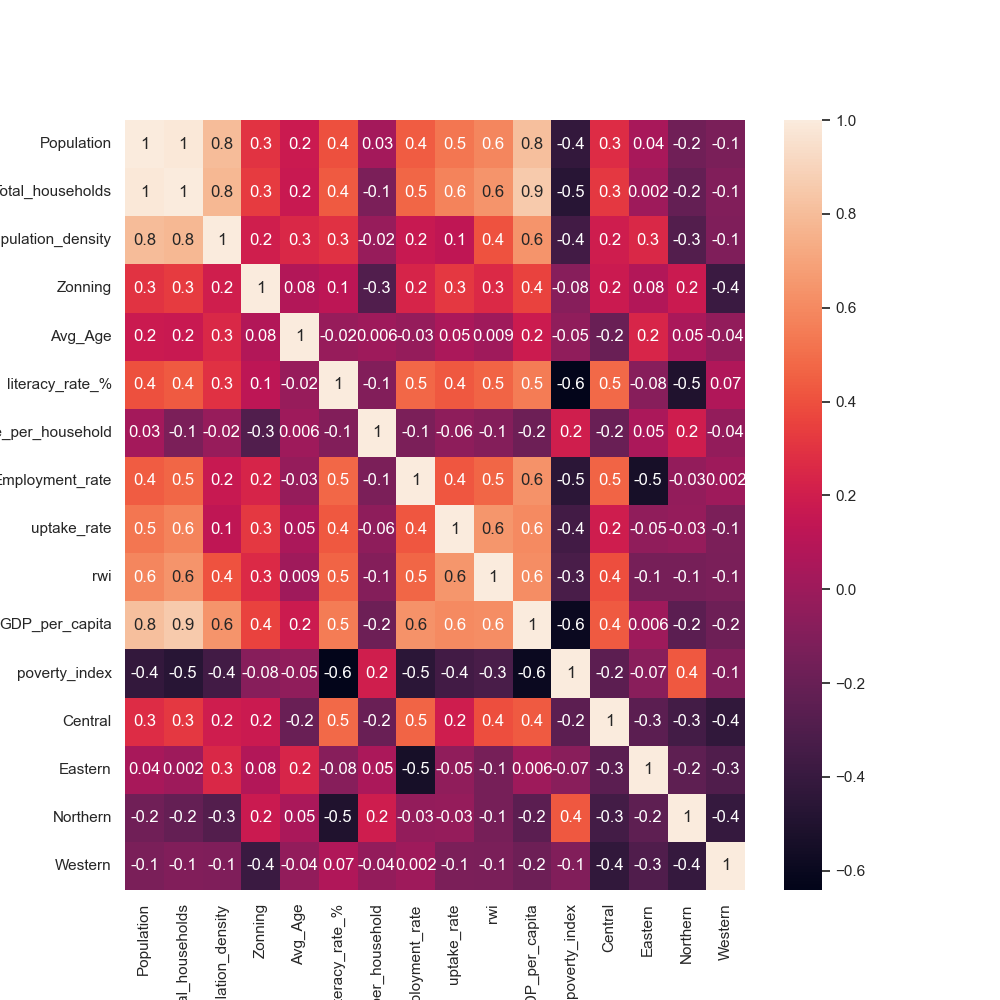

C:\Users\Layo\AppData\Local\Temp\ipykernel_15424\2398267690.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


In [ ]:
#checking correlation using multivariate graphical format using heatmap
plt.figure(figsize=(10,10))
sns.set_theme(style="white")
corr = df_train.corr()
heatmap = sns.heatmap(corr, annot=True, fmt='.1g')

**Population seems to have a strong correlation with Total_household, so We will drop population from the model to avoid multicolinearity. Also the AVG_Age seems to have little to no effect on the uptake rate, it will be dropped too. Feutures like Eastern and Northern have low effect on the uptake rate, but since they are with Western and Central that have more effect on the uptake rate, they will be retained**

### Modelling

In [ ]:
#select features
X= df_train.drop(['District','uptake_rate','Population', 'Avg_Age', 'Population_density'], axis=1)
y= df_train['uptake_rate']

In [ ]:
# split into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, 
                                                    y, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [ ]:
# import regression module
from sklearn.linear_model import LinearRegression

In [ ]:
#Build the linear regression model
lm=LinearRegression()

In [ ]:
# train model
lm.fit(X_train1, y_train1)

LinearRegression()

In [ ]:
lm.coef_.shape

(12,)

In [ ]:
X.columns.shape

(12,)

In [ ]:
# extract model coeffs
weights = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [ ]:
#sort weights in order decreasing importance ignoring the negativesigns
weights.reindex(weights.Coefficient.abs().sort_values(ascending= False).index)

,Coefficient
rwi,7.557029
Central,-2.855845
Northern,2.346934
Zonning,0.594299
Eastern,0.308475
Western,0.200436
literacy_rate_%,0.199234
people_per_household,-0.096529
poverty_index,-0.035682
Employment_rate,-0.015887


In [ ]:
from sklearn import metrics
import math

In [ ]:
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "MLR": metrics.mean_squared_error(y_train1, lm.predict(X_train1))
                    },
                'Test MSE':
                    {
                        "MLR": metrics.mean_squared_error(y_test1, lm.predict(X_test1))
                    },
                'Test RMSE':
                    {
                        "MLR": math.sqrt(metrics.mean_squared_error(y_test1, lm.predict(X_test1)))
                    }
                }

In [ ]:
# create dataframe from dictionary
metrics_ = pd.DataFrame(data=results_dict)
metrics_

,Training MSE,Test MSE,Test RMSE
MLR,11.173984,17.716431,4.209089


#### LASSO REGRESSION

In [ ]:
# Import the scaling module
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create standardization object
scaler = StandardScaler()

In [ ]:
# Save standardized features into new variable
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [ ]:
# Import LASSO module
from sklearn.linear_model import Lasso

In [ ]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.005)

In [ ]:
# Train the LASSO model
lasso.fit(X_train, y_train)

Lasso(alpha=0.005)

In [ ]:
# Extract intercept from model
intercept = float(lasso.intercept_)

In [ ]:
# Extract coefficient from model
coeff = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])

In [ ]:
# Extract intercept
print("Intercept:", float(intercept))

Intercept: 2.3013684676510255


let's inspect the coefficient

In [ ]:
#sort the coefficient
coeff.reindex(coeff.Coefficient.abs().sort_values(ascending= False).index)

,Coefficient
Total_households,4.623421
rwi,1.935261
GDP_per_capita,1.164663
Northern,0.949860
Employment_rate,-0.561711
Central,-0.496469
literacy_rate_%,0.473106
poverty_index,0.358038
people_per_household,0.351990
Zonning,0.335329


**Lets fit in rigde model**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge= Ridge()

In [ ]:
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
# Extract coefficient from model
coeff_ridge= pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])

In [ ]:
coeff_ridge

,Coefficient
Total_households,4.165244
Zonning,0.371976
literacy_rate_%,0.467136
people_per_household,0.351761
Employment_rate,-0.522585
rwi,1.965591
GDP_per_capita,1.318571
poverty_index,0.315306
Central,-0.555107
Eastern,-0.322071


In [ ]:
# generate prediction for train and test
train_lasso = lasso.predict(X_train)
train_lm= lm.predict(X_train1)
train_ridge= ridge.predict(X_train)
test_lm= lm.predict(X_test1)
test_ridge = ridge.predict(X_test)
test_lasso = lasso.predict(X_test)

In [ ]:
# Dictionary of results
results_dict1 = {'Training MSE':
                    {
                        "Linear Reg": metrics.mean_squared_error(y_train1, train_lm),
                        "Ridge": metrics.mean_squared_error(y_train, train_ridge),
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso)
                    },
                    'Test MSE':
                    {
                        "Linear Reg": metrics.mean_squared_error(y_test1, test_lm),
                        "Ridge": metrics.mean_squared_error(y_test, test_ridge),
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso)
                    }
                }

In [ ]:
# create dataframe from dictionary
metrics_1 = pd.DataFrame(data=results_dict1)
metrics_1

,Training MSE,Test MSE
Linear Reg,11.173984,17.716431
Ridge,6.673608,89.221224
LASSO,6.636398,99.480093


The Lasso generalises more on the train and test set and its therfore the best performing model

#### NON LINEAR MODEL

#### DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=4,random_state=10)

In [ ]:
#get best params with gridsearch
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(regr_tree,
                  param_grid = {'max_depth': range(1, 13),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

{'max_depth': 3, 'min_samples_split': 10}
18.402924662314447


In [ ]:
# fit the tree model
regr_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, random_state=10)

In [ ]:
# get train predictions
train_reg_tree= regr_tree.predict(X_train)
# get test predictions
test_reg_tree= regr_tree.predict(X_test)

**Let's compare the result to that of other models**

In [ ]:
# Dictionary of results
results_dict2 = {'Training MSE':
                    {
                        "Linear Reg": metrics.mean_squared_error(y_train1, train_lm),
                        "Ridge": metrics.mean_squared_error(y_train, train_ridge),
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso),
                        "Reg Tree": metrics.mean_squared_error(y_train, train_reg_tree)
                    },
                    'Test MSE':
                    {
                        "Linear Reg": metrics.mean_squared_error(y_test1, test_lm),
                        "Ridge": metrics.mean_squared_error(y_test, test_ridge),
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso),
                        "Reg Tree": metrics.mean_squared_error(y_test, test_reg_tree)
                    }
                }

In [ ]:
# create dataframe from dictionary
metrics_2 = pd.DataFrame(data=results_dict2)
metrics_2

,Training MSE,Test MSE
Linear Reg,11.173984,17.716431
Ridge,6.673608,89.221224
LASSO,6.636398,99.480093
Reg Tree,1.147202,4.594458


#### RANDOM FOREST REGRESSOR

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#get best params with gridsearch
from sklearn.model_selection import GridSearchCV

gs_rf = GridSearchCV(RF,
                  param_grid = {'max_depth': range(1, 11),
                                'n_estimators': range(1,20,5),
                                'min_samples_split': range(10, 30, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs_rf.fit(X_train, y_train)

print(gs_rf.best_params_)
print(-gs_rf.best_score_)

{'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 11}
17.06367240122067


In [ ]:
# Our forest consists of 20 trees with a max depth of 5 in this example
RF = RandomForestRegressor(n_estimators= 10, max_depth=3)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=3, n_estimators=10)

In [ ]:
# get train predictions
train_RF= RF.predict(X_train)
# get test predictions
test_RF= RF.predict(X_test)

In [ ]:
# Extracting the importances by sklearn 
# Saving the feature names 
features = X.columns.tolist()
important_feat = RF.feature_importances_

# Creating a dataframe with the feature importance by sklearn
feature_importance = {}
for i, feature in enumerate(features):
    feature_importance[feature] = round(important_feat[i], 5)

print(f"Feature importance by sklearn: {feature_importance}")

Feature importance by sklearn: {'Total_households': 0.1677, 'Zonning': 0.18306, 'literacy_rate_%': 0.0384, 'people_per_household': 0.03586, 'Employment_rate': 0.24885, 'rwi': 0.00307, 'GDP_per_capita': 0.09, 'poverty_index': 0.21497, 'Central': 0.0, 'Eastern': 0.0181, 'Northern': 0.0, 'Western': 0.0}


In [ ]:
#add a title to the dictionary
Feats=  {'Values': feature_importance}

In [ ]:
# create dataframe from dictionary
impt_feats = pd.DataFrame(data=Feats)
impt_feats.sort_values(by= 'Values', ascending= False)

,Values
Employment_rate,0.24885
poverty_index,0.21497
Zonning,0.18306
Total_households,0.16770
GDP_per_capita,0.09000
literacy_rate_%,0.03840
people_per_household,0.03586
Eastern,0.01810
rwi,0.00307
Central,0.00000


In [ ]:
#save the model in a picke file
#pickle.dump(RF, open('RF_model.sav', 'wb'))

**WITH SELECTED COLS**

In [ ]:
Selected_cols2= ['poverty_index', 'Employment_rate', 'Total_households','GDP_per_capita','Zonning']

In [ ]:
X2= X[Selected_cols2]

In [ ]:
# Save standardized features into new variable
X2_scaled = scaler.fit_transform(X2)

In [ ]:
# Split dataset into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, 
                                                    y, 
                                                    test_size=0.20,
                                                    random_state=1,
                                                    shuffle=False)

In [ ]:
# Our forest consists of 20 trees with a max depth of 5 in this example
RF_cols = RandomForestRegressor(n_estimators=5, max_depth= 3)
RF_cols.fit(X2_train,y2_train)

RandomForestRegressor(max_depth=3, n_estimators=5)

In [ ]:
# get train predictions
train_RF_cols= RF_cols.predict(X2_train)
# get test predictions
test_RF_cols= RF_cols.predict(X2_test)

In [ ]:
#save the model in a picke file
pickle.dump(RF_cols, open('RF_model_imp_feats.sav', 'wb'))

**Compare Results**

In [ ]:
# Dictionary of results
results_dict3 = {'Training MSE':
                    {
                        "Linear Reg": metrics.mean_squared_error(y_train1, train_lm),
                        "Ridge": metrics.mean_squared_error(y_train, train_ridge),
                        "LASSO": metrics.mean_squared_error(y_train, train_lasso),
                        "Reg Tree": metrics.mean_squared_error(y_train, train_reg_tree),
                        "Random Forest": metrics.mean_squared_error(y_train, train_RF),
                        "Random Forest sel cols": metrics.mean_squared_error(y_train, train_RF_cols)
                    },
                    'Test MSE':
                    {
                        "Linear Reg": metrics.mean_squared_error(y_test1, test_lm),
                        "Ridge": metrics.mean_squared_error(y_test, test_ridge),
                        "LASSO": metrics.mean_squared_error(y_test, test_lasso),
                        "Reg Tree": metrics.mean_squared_error(y_test, test_reg_tree),
                        "Random Forest": metrics.mean_squared_error(y_test, test_RF),
                        "Random Forest sel cols": metrics.mean_squared_error(y_test, test_RF_cols)
                    },
                 
                 'R SQUARED Training':
                     {
                         'Linear Reg': metrics.r2_score(y_train1, train_lm),
                         "Ridge": metrics.r2_score(y_train, train_ridge),
                         "LASSO": metrics.r2_score(y_train, train_lasso, multioutput='variance_weighted' ),
                         "Reg Tree": metrics.r2_score(y_train, train_reg_tree),
                         "Random Forest": metrics.r2_score(y_train, train_RF, multioutput='variance_weighted'),
                         "Random Forest sel cols": metrics.r2_score(y_train, train_RF_cols)
                     },
                 
                'R SQUARED Test':
                     {
                         'Linear Reg': metrics.r2_score(y_test1, test_lm),
                         "Ridge": metrics.r2_score(y_test, test_ridge),
                         "LASSO": metrics.r2_score(y_test, test_lasso),
                         "Reg Tree": metrics.r2_score(y_test, test_reg_tree),
                         "Random Forest": metrics.r2_score(y_test, test_RF),
                         "Random Forest sel cols": metrics.r2_score(y_test, test_RF_cols)
                     }
                }

In [ ]:
# create dataframe from dictionary
metrics_3 = pd.DataFrame(data=results_dict3)
metrics_3

,Training MSE,Test MSE,R SQUARED Training,R SQUARED Test
Linear Reg,11.173984,17.716431,0.622549,-12.265520
Ridge,6.673608,89.221224,0.770420,-22.416584
LASSO,6.636398,99.480093,0.771700,-25.109078
Reg Tree,0.711709,3.032845,0.975516,0.204014
Random Forest,11.945465,0.510294,0.589062,0.866071
Random Forest sel cols,3.044785,1.363848,0.895256,0.642051


**So far Random Forest Model Seems to have generated the most consitent result and therefore has performed better in terms of metrics**

#### Get predictions

In [ ]:
# get csv for kaggle random forest
df_train_rf= df_train.drop(['District','uptake_rate'], axis=1)
RF.fit(df_train_rf, y)
preds= RF.predict(df_test.drop('District', axis=1))

In [ ]:
Predrf = pd.DataFrame()

In [ ]:
Predrf['District']=df_test['District']
Predrf['Uptake_rate']= preds

In [ ]:
Pred_rf=Predrf.set_index('District')

In [ ]:
Predrf

In [ ]:
Predrf.to_csv('Predicted Uptake.csv', index= False)

In [ ]:
df_calculated_uptake= df_train[['District', 'uptake_rate']]


In [ ]:
df_calculated_uptake.to_csv('Calculated Uptake.csv', index= False)